<a href="https://colab.research.google.com/github/teaganscanlon/325-Midterm/blob/main/Scanlon_Midterm_325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction



The purpose of this project is to analyze the data of voter registration in the United States and be able to gain knowledge from the way we analyze and visualize the data given. The goal of this project is to gain information from the data we analyze and visualize in a way that helps us see patterns on a national and state level and helps us answer our specific research questions by modifying the data in ways that answer our questions. It is important for someone to read this notebook because it provides information on how new voter registration changes over a period of time in both on the national and state level and how specifically each state numbers shown in the data affect the data as a whole.

Research Questions:

1. National Level-
    * In the years given in the data does new voter registration increase or decrease?
2. State Level-
    * What year had the most registered voters for Virginia?


## Importing Needed Libraries and Data

In [16]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#dataset
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


## Showing the Data

In [3]:
voters.head()
#showing first 5 rows of data
#Jurisdiction is which state the data is recorded
#Year is which year the data is recorded
#Month is which month the data is recorded
#New register voters is the number of newly registered voters that are recorded

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [31]:
voters.isna()
#there is no missing data

,NAME,Year,Month,registered_voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


In [16]:
#datatypes
voters.dtypes
#there are two objects and two interegers used

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [3]:
#renaming certain columns to make working with the dat easier
voters = voters.rename(columns = {"Jurisdiction":"NAME",
                                  "New registered voters":"registered_voters"})
voters.head()
#showing column name changes

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Potential limitations of the data could be that there is only a sample size of 12 states instead of all of 50 states leading to the total voter registration numbers noot being completely true because the sample data does not use all 50 states and the District of Columbia together. Another potential limitation is that the data is only coming from the two elections years of 2016 and 2020 and only uses the first 5 months of the year. This is a very small sample size and registration may be elevated due to it being a presidental election year.

## Data Analysis

In [6]:
#highest number of new voter registration showing the state, month, year and number of registered voters
voters.loc[voters.registered_voters==voters.registered_voters.max()]
#Califoria
#2020
#Febuary
#238281

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [7]:
#average voter registration
#using mean to show average
voters.registered_voters.mean()
#the average is 48223 voters

48223.46226415094

In [8]:
#showing how many times voter registration was above average
#creating data we need
high_voters = voters.loc[voters.registered_voters>=voters.registered_voters.mean()]
high_voters
#voter registeration went above average 93 times

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


In [11]:
#the number of times each states went above the national average of new voter registration
#creating data we need
national_avg = voters["registered_voters"].mean()
voters["new_voters_above_average"] = voters["registered_voters"] > national_avg
times_above = voters.groupby("NAME")["new_voters_above_average"].sum()
times_above

,new_voters_above_average
NAME,
Arizona,3
California,7
Colorado,0
Delaware,0
District of Columbia,0
Florida,7
Georgia,1
Illinois,4
Maryland,0


Number of times states went above the national average of new voter registration
1. Arizona- 3
2. California- 7
3. Florida- 7
4. Georgia- 1
5. Illinois- 4
6. North Carolina- 6
7. Texas- 8

The other states did not ever go above the national average


In [10]:
#three states that had the highest average voter registration overall
top_3_states = voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False)
top_3_states.head(3)
#California, Texas, and Florida were the top 3 states

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


## Data Visualization- Plots

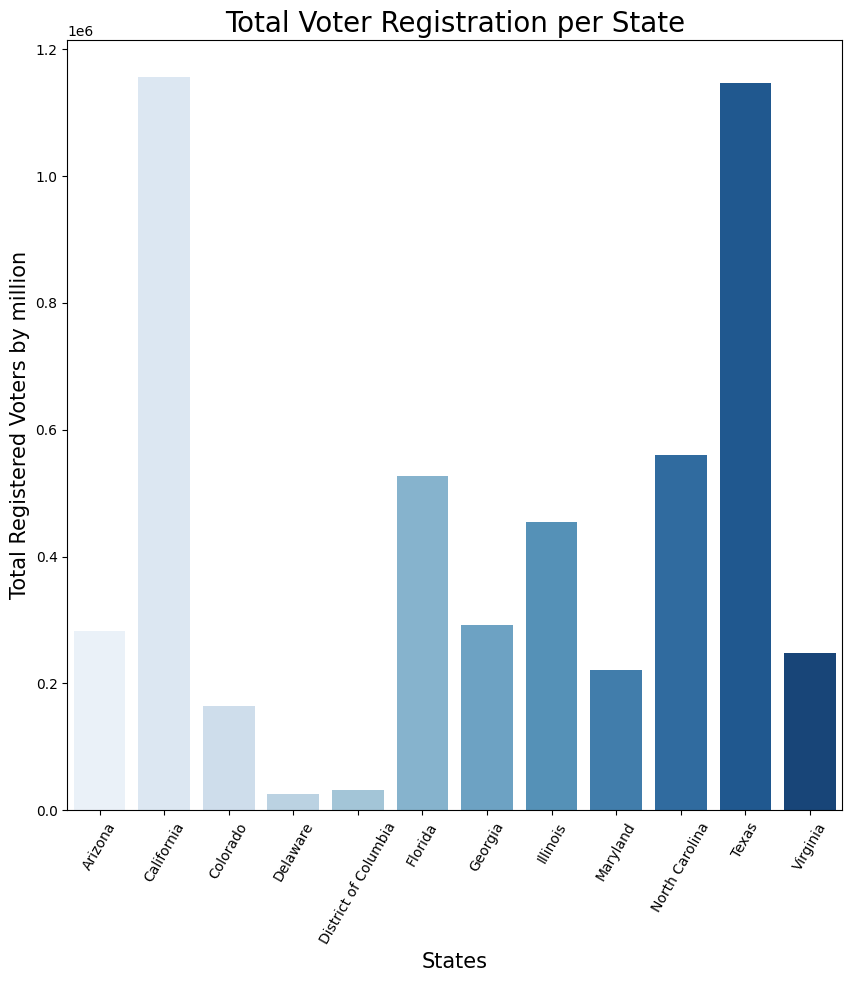

In [14]:
#plot showing the voter registration by state
#creating the data we want to plot
state_voters = voters.groupby("NAME")["registered_voters"].sum().reset_index()
#mapping the data
fig = plt.figure(figsize = (10,10))
sns.barplot(state_voters, x="NAME", y="registered_voters", palette="Blues", hue = "NAME", legend=False)
plt.xlabel("States", fontsize=15)
plt.ylabel("Total Registered Voters by million", fontsize=15)
plt.xticks(rotation=60)
plt.title("Total Voter Registration per State", fontsize=20)
plt.show()
#States that have higher populations such as California and Texas seem to have have higher total voter registration

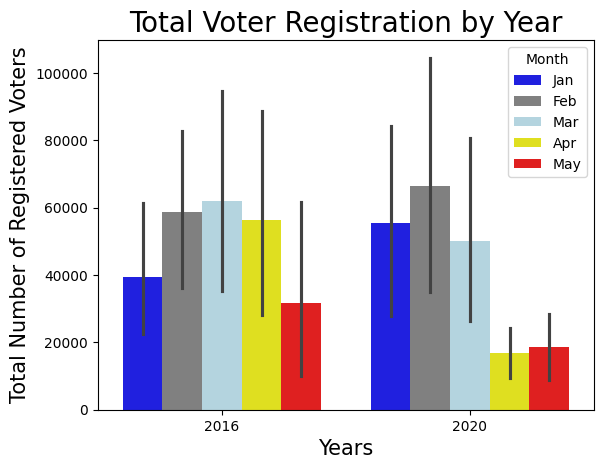

In [30]:
#plot comparing voter registration in 2016 and 2020
#plotting the data
color_set = ["blue","gray","lightblue","yellow","red"]
sns.barplot(voters, x="Year", y="registered_voters", palette = color_set, hue = "Month", legend=True )
plt.xlabel("Years",fontsize=15)
plt.ylabel("Total Number of Registered Voters", fontsize=15)
plt.title("Total Voter Registration by Year", fontsize= 20)
plt.show()
#For both years it seems that total voter registration starts to rise and then falls towrds the end of the 5 months given for both 2016 and 2020 in the data
#The big fall in April and May of 202 may be due to COVID-19 pandemic

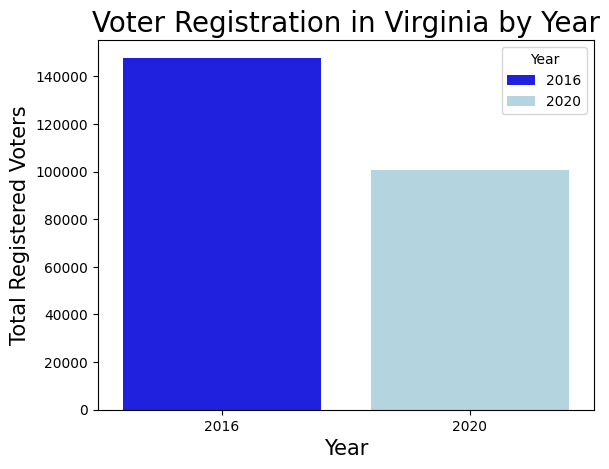

In [9]:
#State level question
#What year had the most registered voters for Virginia?
#plot comparing voter registration in Virginia from 2016 to 2020
#creating data we want to plot
virginia_voters = voters[voters["NAME"] == "Virginia"]
virginia_voting = virginia_voters.groupby("Year")["registered_voters"].sum().reset_index()
#plotting the data
color_set_ = ["blue", "lightblue"]
sns.barplot(virginia_voting, x="Year", y="registered_voters", hue = "Year", palette=color_set_, legend= True)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Registered Voters", fontsize=15)
plt.title("Voter Registration in Virginia by Year", fontsize=20)
plt.show()

## Mapping the Data

fatal: destination path '325-Datasets' already exists and is not an empty directory.


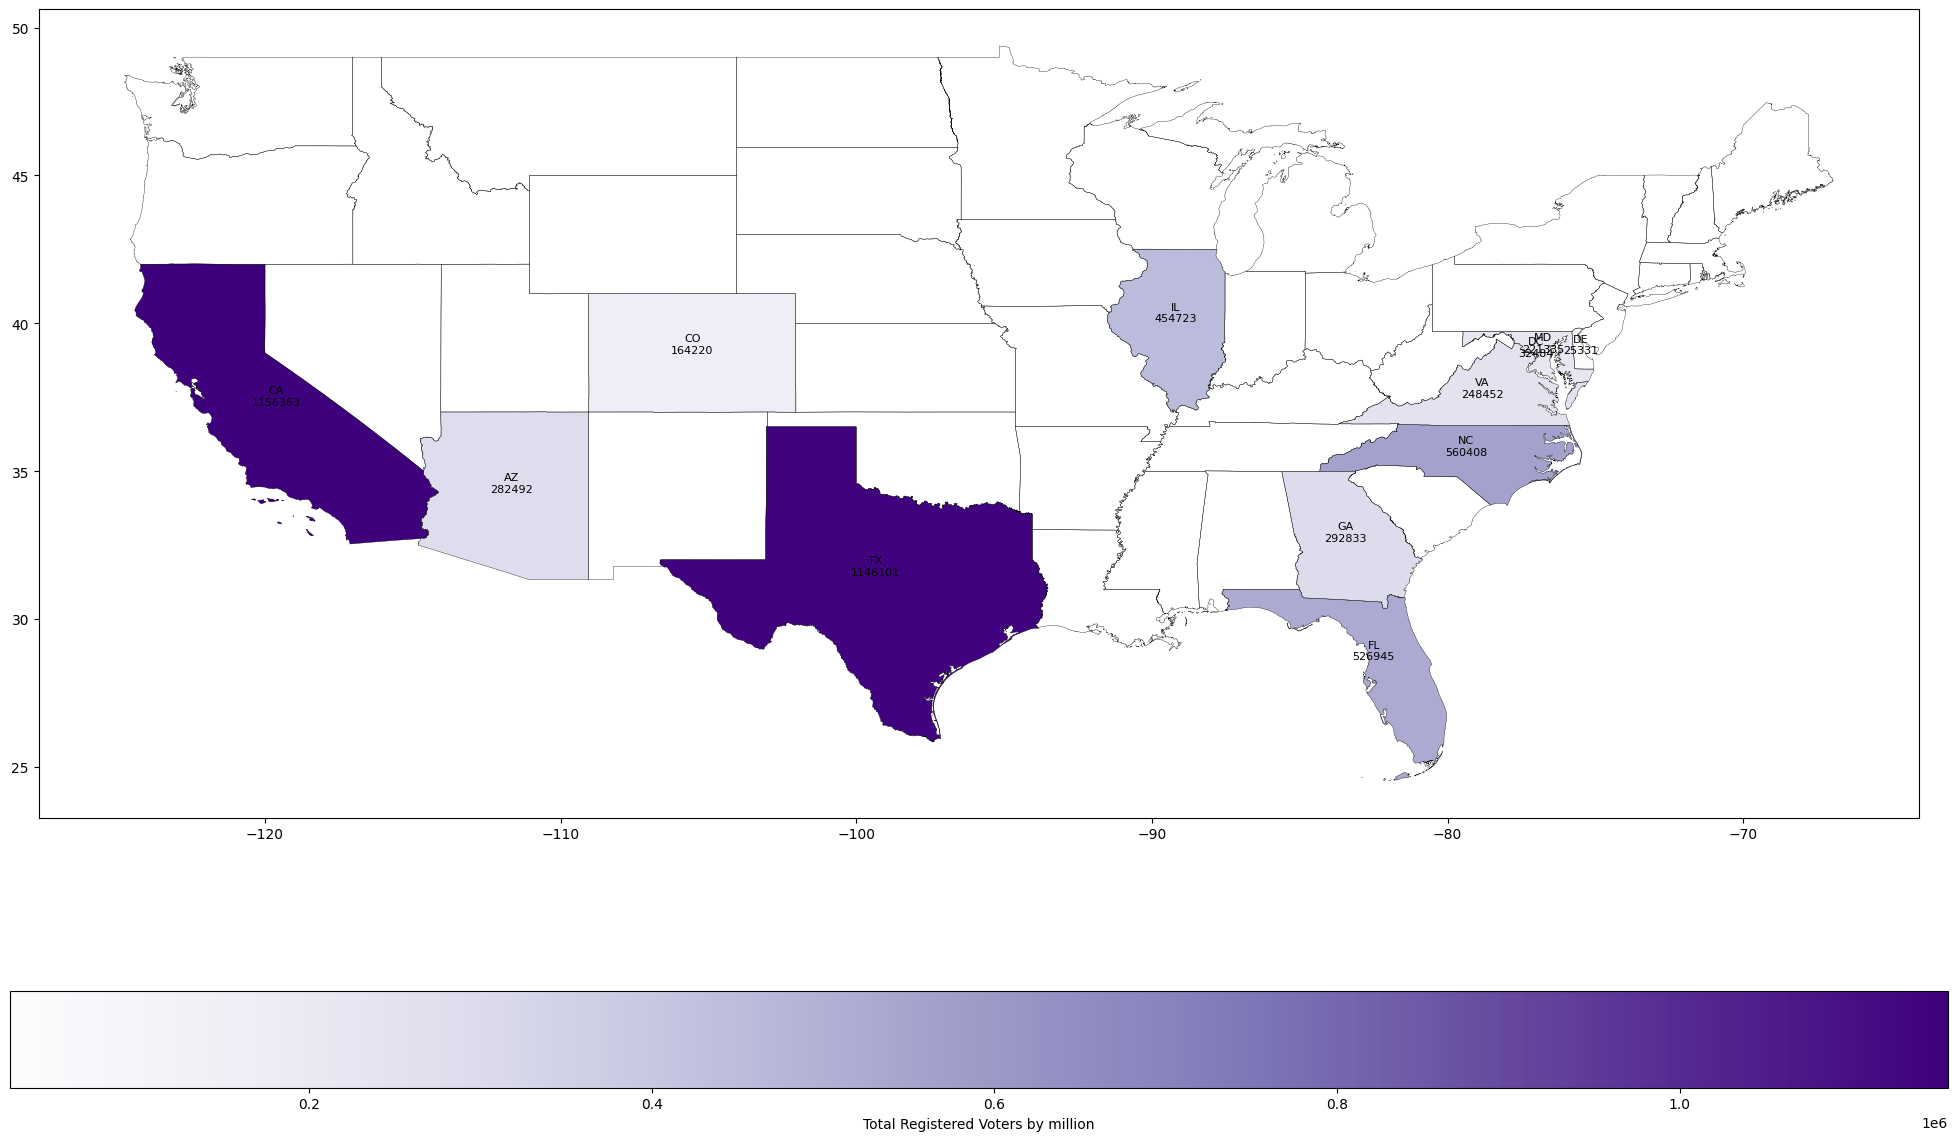

In [12]:
#mapping average voter registration per state using Continental USA
#geographic data needed
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
#setting box size
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]
#creating data we want for the map
voters_by_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()
#merging the data to the map
mapped_voters = bbox.merge(voters_by_state, on = "NAME", how= "inner")
mapped_voters.head(2)
#mapping the data
fig = plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
bbox.boundary.plot(ax=ax,linewidth=.25,edgecolor="black")
mapped_voters.plot(column="registered_voters",ax=ax, legend=True,cmap="Purples",
                   legend_kwds={"label": "Total Registered Voters by million",
                                "orientation":"horizontal"})
mapped_voters.apply(lambda x: ax.annotate(text=x.STUSPS+ "\n" + str(int(x.registered_voters)),
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=8),axis=1)
plt.show()

## Conclusion

Insights that I noticed when constructing this notebook was how much state population affects voter registration but also how other factors can effect voter registration as well. Looking at the plot of Total Voter Registration we can see that District of Columbia's voter registration was higher than Delaware's. This has to be due to other factors than population because Delawre's population is much higher than the District of Columbia. It also very interesting that District of Columbia is one of places picked for this dataset instead of picking another states.

Suggestions I could offer would be getting a larger sample size of data to see how the averages such as the total amout of new registered voters change. Also looking at years that aren't presidental elections could be helpful in order to see if new voter registration drops or stays the same during those years. Overall using the data we were given can be able to see how certain factors affect new voter registration on a national level such as the pandemic COVID-19.

Possible next steps that I would take if I were to continue working on this project is doing more research is looking more at the factors other than population that can affect voter registration in specifc states. A place such as the District of Columbia is very politically active may be factor that causes more people in that jurisdiction to decide to vote. Other factors I would want to research is looking at the ages people decided to register to vote. Are there a lot of people above the age of 18 that register to vote or it is mostly just young citizens of United States who have finally reached the age where they can vote.

## Github link:

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Teagan Scanlon